In [1]:
import os
import numpy as np
import pandas as pd
import loompy as lp
import anndata as ad
import scanpy as sc

In [2]:
data_dir = '/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_GSE135337/'
os.chdir(data_dir)

In [3]:
names_list = ["GSM4006644_BC1", "GSM4006647_BC4" ,"GSM4006648_BC5", "GSM4751267_BC6" ,"GSM4751268_BC7"]

GSM4006644_BC1


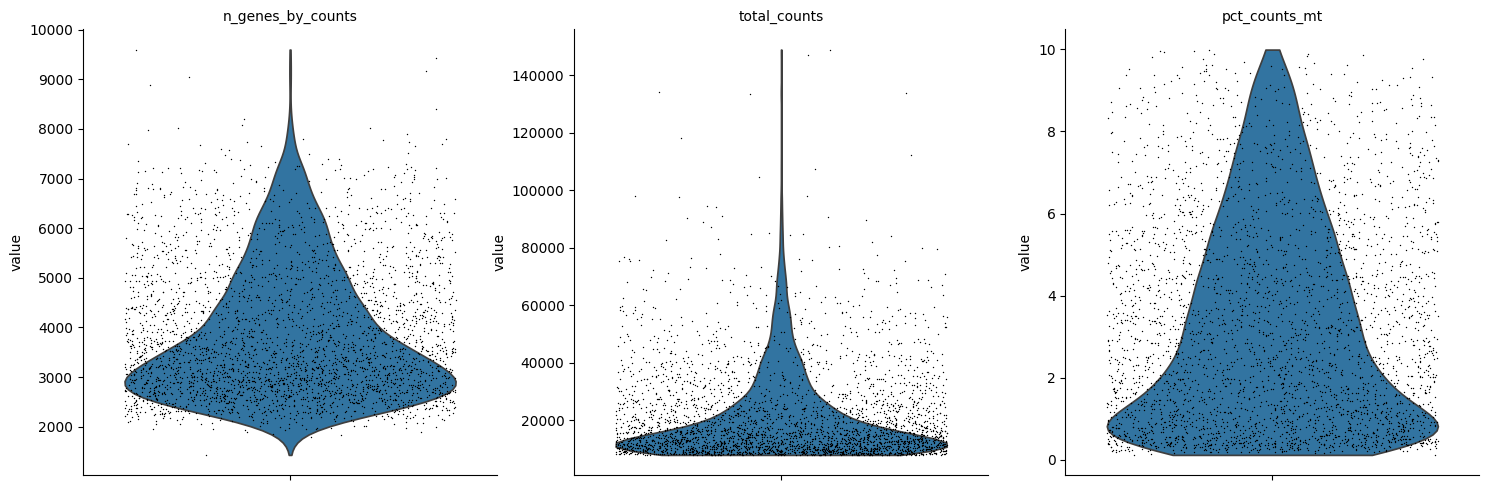

/tmp/ipykernel_348311/1238091213.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006647_BC4


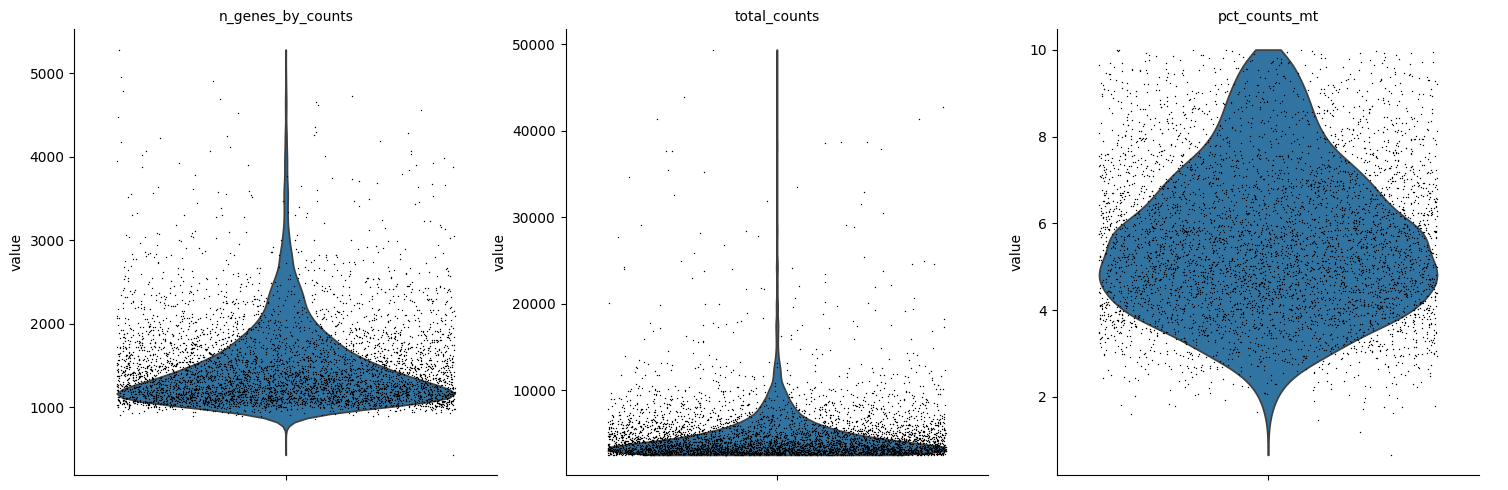

/tmp/ipykernel_348311/1238091213.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006648_BC5


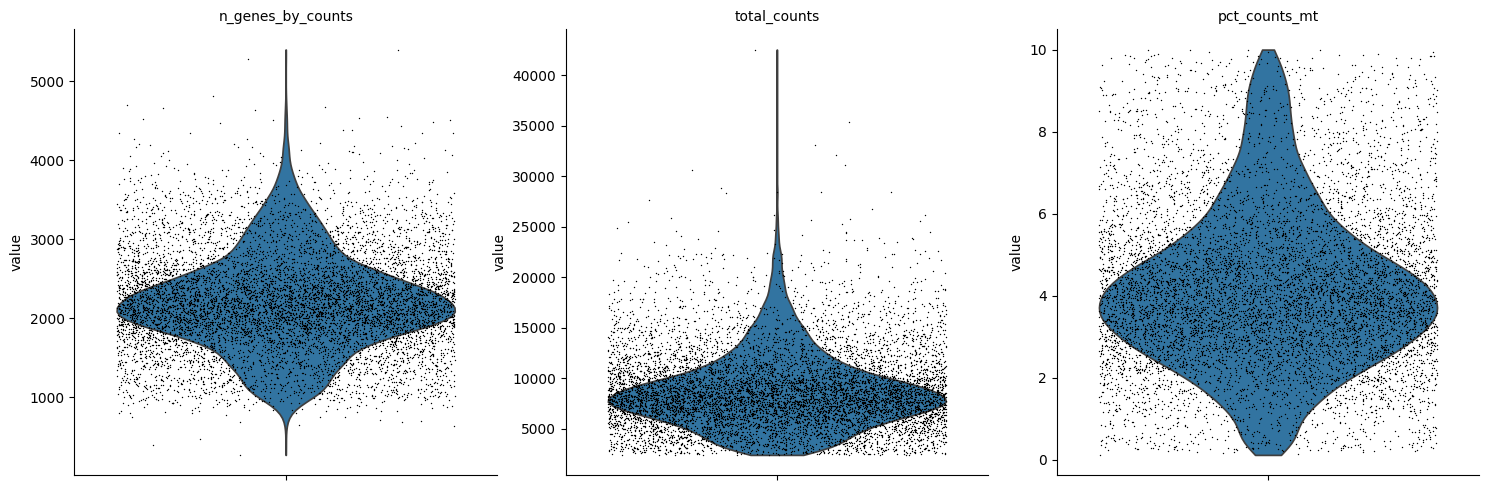

/tmp/ipykernel_348311/1238091213.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751267_BC6


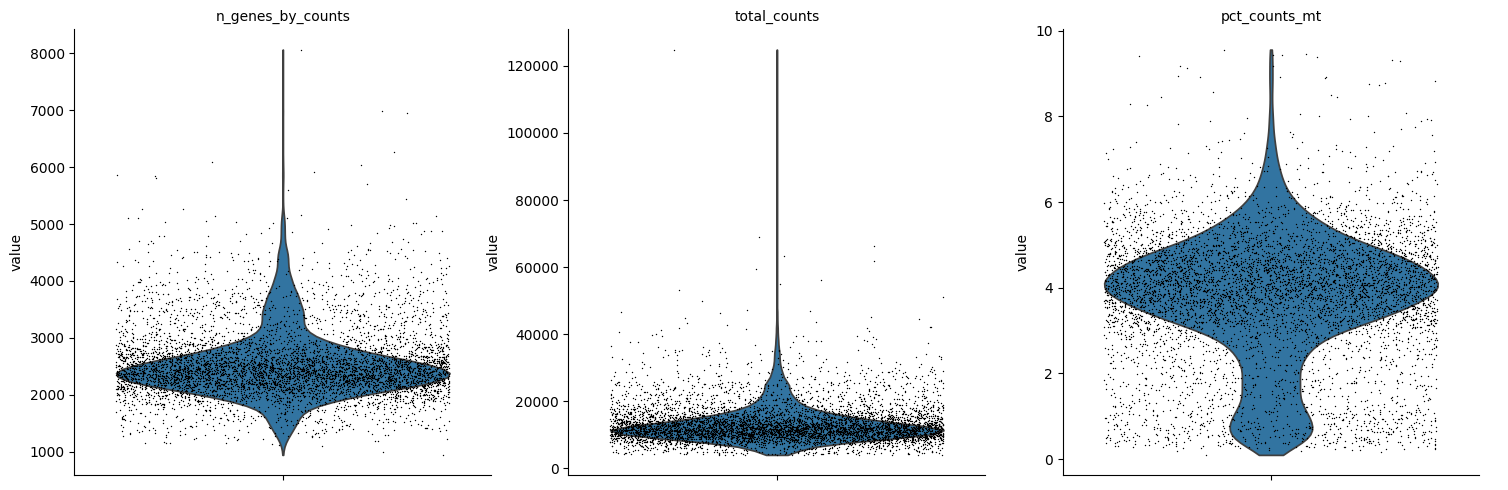

/tmp/ipykernel_348311/1238091213.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751268_BC7


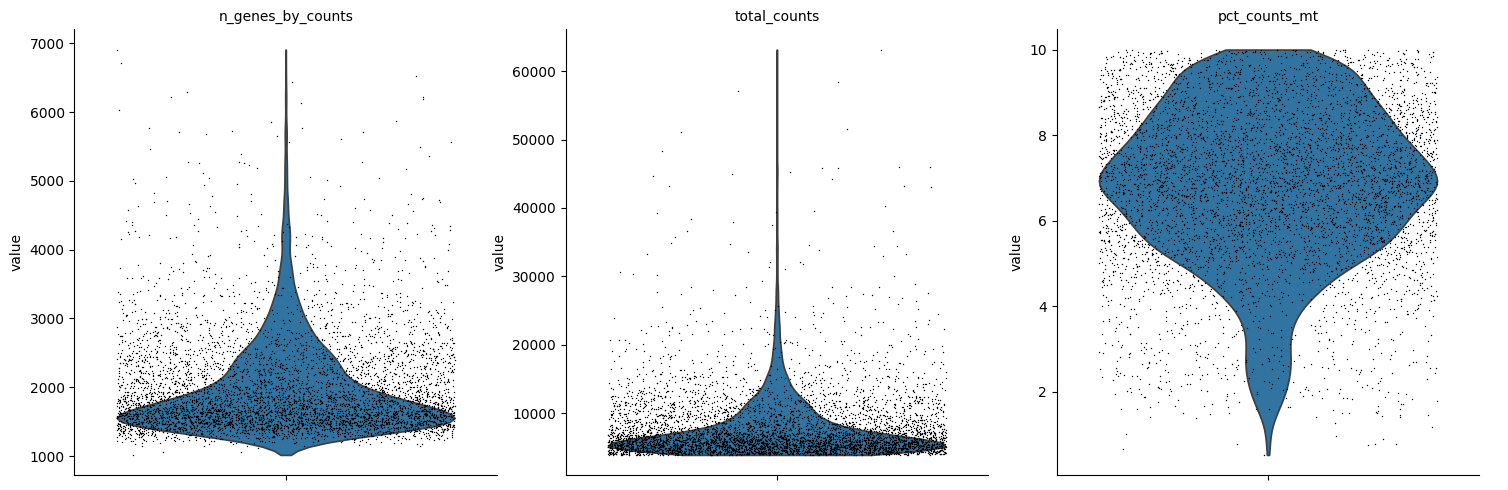

/tmp/ipykernel_348311/1238091213.py:35: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


In [4]:
adata_list = []

# Loop over each sample and read in the AnnData object
for name in names_list:
    file_path = f"{name}_gene_cell_exprs_table.txt.gz"
    df = pd.read_csv(file_path, sep='\t')
    df.index = df.iloc[:, 0]
    gene_symbols = df.iloc[:,:2]

    # Drop the first two columns (Ensembl ID and gene name)
    df = df.iloc[:, 2:]
    # Transpose so that cells are rows and genes are columns
    df = df.T

    adata = ad.AnnData(df)

    adata.obs['CellID']= df.index
    adata.var[['Ensemble_ID','Gene']]= gene_symbols
    adata.var.index= adata.var['Gene']
    adata.var_names_make_unique() 
    adata.var['mt'] =adata.var_names.str.startswith('MT-')

    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    print(name)
    sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True)
    
    adata= adata[adata.obs.n_genes_by_counts <6001, :]
    #adata= adata[adata.obs.pct_counts_mt< 5, :].copy()

    adata.obs['source'] = name
    adata.layers["counts"] = adata.X.copy()    

    #sc.pp.normalize_total(adata, target_sum=1e4)
    #sc.pp.log1p(adata)
    #adata.raw = adata  # keep full dimension safe
    adata_list.append(adata)
    

In [6]:
batch_names = [adata.obs['source'].iloc[0] for adata in adata_list]
adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)                                  

/tmp/ipykernel_348311/1379501109.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)


In [12]:
immune_remove = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/immune_cells_obs.csv',index_col=0)

In [13]:
immune_remove

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Status,Stage
ACATACGCATCAGTCA.1-GSM4006644_BC1,ACATACGCATCAGTCA.1,1861,1861,8148,391,4.798724,GSM4006644_BC1,0,0,10,Ta,Ta
ACTATCTAGCCATCGC.1-GSM4006644_BC1,ACTATCTAGCCATCGC.1,3923,3923,16928,546,3.225425,GSM4006644_BC1,0,0,10,Ta,Ta
AGAATAGAGGAATGGA.1-GSM4006644_BC1,AGAATAGAGGAATGGA.1,2476,2476,8285,262,3.162342,GSM4006644_BC1,0,0,9,Ta,Ta
AGCCTAATCTGCTTGC.1-GSM4006644_BC1,AGCCTAATCTGCTTGC.1,3155,3155,13430,230,1.712584,GSM4006644_BC1,0,0,10,Ta,Ta
AGGTCCGGTGCTTCTC.1-GSM4006644_BC1,AGGTCCGGTGCTTCTC.1,2279,2279,8232,117,1.421283,GSM4006644_BC1,0,0,9,Ta,Ta
...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTCAAGTGCATCTA.1-GSM4751268_BC7,TTCTCAAGTGCATCTA.1,1878,1878,6270,423,6.746411,GSM4751268_BC7,4,0,10,Ta,Ta
TTCTTAGTCTTCGGTC.1-GSM4751268_BC7,TTCTTAGTCTTCGGTC.1,1759,1759,5771,45,0.779761,GSM4751268_BC7,4,0,9,Ta,Ta
TTGACTTGTCCAGTTA.1-GSM4751268_BC7,TTGACTTGTCCAGTTA.1,2171,2171,8142,585,7.184967,GSM4751268_BC7,4,0,10,Ta,Ta
TTGTAGGCACATTCGA.1-GSM4751268_BC7,TTGTAGGCACATTCGA.1,2378,2378,9312,377,4.048540,GSM4751268_BC7,4,0,10,Ta,Ta


In [14]:
adata = adata[~adata.obs.index.isin(immune_remove.index),]

In [5]:
# set a working directory
out_dir = "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_scenic/"
os.chdir( out_dir )

# path to unfiltered loom file (this will be created in the optional steps below)
# f_loom_path_unfilt = "pbmc10k_unfiltered.loom" # test dataset, n=500 cells

# # path to loom file with basic filtering applied (this will be created in the "initial filtering" step below). Optional.
f_loom_path_scenic = "full_filtered_scenic.loom"


In [16]:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)

In [17]:
adata.raw = adata  # keep full dimension safe

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


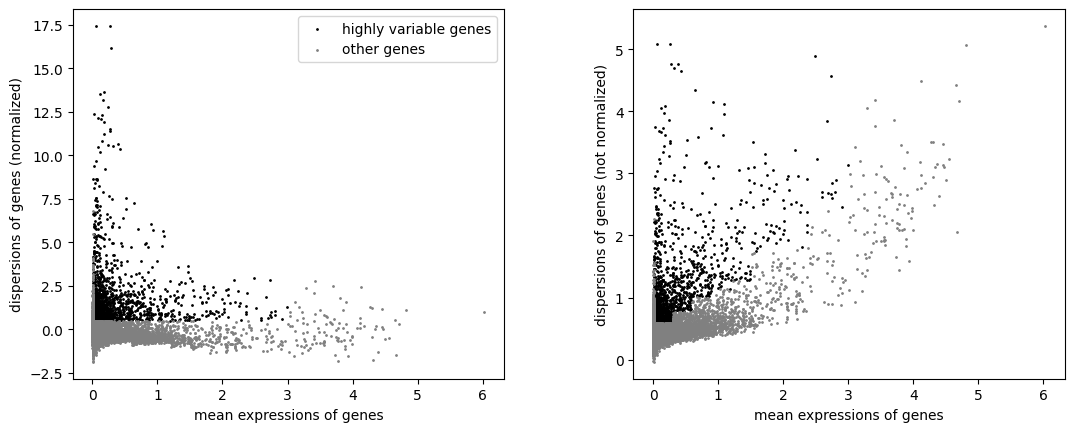

/home/jing/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [18]:

# identify highly variable genes.
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

# keep only highly variable genes:
adata = adata[:, adata.var['highly_variable']]

# regress out total counts per cell and the percentage of mitochondrial genes expressed
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'] ) #, n_jobs=args.threads)

# scale each gene to unit variance, clip values exceeding SD 10.
sc.pp.scale(adata, max_value=10)


/home/jing/.local/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


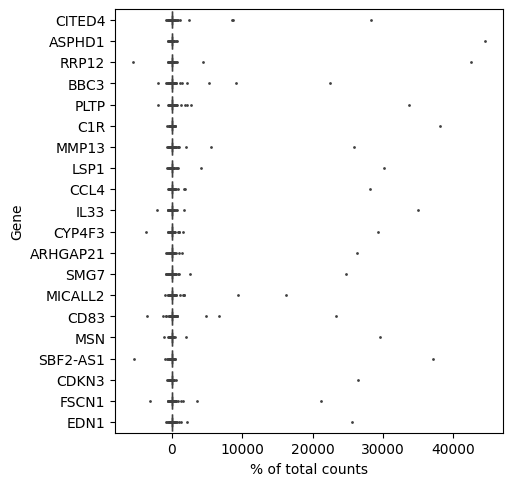

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20)

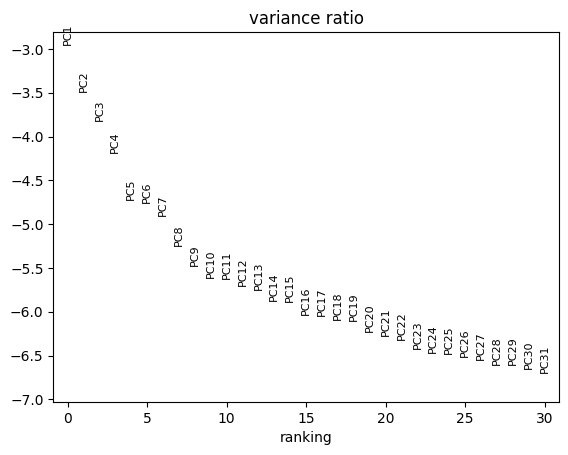

In [20]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
# neighborhood graph of cells (determine optimal number of PCs here)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
# compute UMAP
sc.tl.umap(adata)

/tmp/ipykernel_348311/1138156529.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.5)


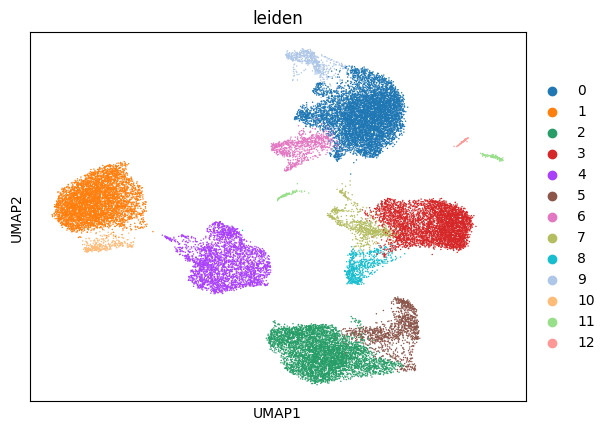

In [22]:
sc.tl.leiden(adata,resolution=0.5)
sc.pl.umap(adata, color=['leiden'] )

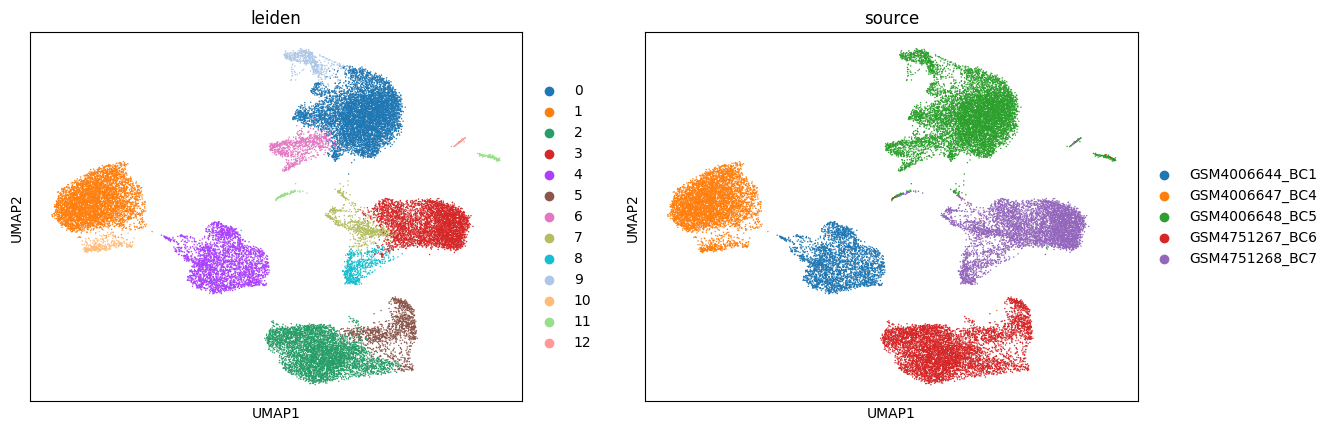

In [23]:
sc.pl.umap(adata, color=['leiden','source'] )

In [24]:
f_tfs = "/home/jing/Phd_project/phd_method/scenic/scenic_DATA/allTFs_hg38.txt" # human

In [25]:
!pyscenic grn {f_loom_path_scenic} {f_tfs} -o adj.csv --num_workers 20


2025-05-02 18:55:03,671 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-05-02 18:55:07,839 - pyscenic.cli.pyscenic - INFO - Inferring regulatory networks.
preparing dask client
parsing input
creating dask graph
20 partitions
computing dask graph
/home/jing/miniforge3/envs/pyscenic/lib/python3.10/site-packages/distributed/client.py:3169: UserWarning: Sending large graph of size 2.84 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
not shutting down client, client was created externally
finished
2025-05-02 19:19:39,515 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/home/jing/miniforge3/envs/pyscenic/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct caus

In [26]:
adjacencies = pd.read_csv(os.path.join(out_dir,"adj.csv"), index_col=False, sep=',')

In [27]:
adjacencies

,TF,target,importance
0,RPS10,RPS12,4.175503e+01
1,RPL6,RPS24,4.056317e+01
2,RPS4X,RPL32,3.892803e+01
3,RPS4X,RPL10,3.834530e+01
4,RPS4X,RPL27A,3.818990e+01
...,...,...,...
1081183,FAAP24,PPP1R14A,2.320310e-19
1081184,CRTC2,COL1A1,1.608318e-19
1081185,HHAT,RARRES2,8.588379e-20
1081186,H1FX,PPP1R14A,4.964299e-20


In [28]:
import glob
# ranking databases
f_db_names = 'hg38_10kbp_up_10kbp_down_full_tx_v10_clust.genes_vs_motifs.rankings.feather'

# motif databases
f_motif_path = "motifs-v9-nr.hgnc-m0.001-o0.0.tbl"



In [29]:
!pyscenic ctx adj.csv \
    {f_db_names} \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {f_loom_path_scenic} \
    --output reg.csv \
    --mask_dropouts \
    --num_workers 20


2025-05-02 19:20:23,126 - pyscenic.cli.pyscenic - INFO - Creating modules.

2025-05-02 19:20:23,394 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-05-02 19:20:30,570 - pyscenic.utils - INFO - Calculating Pearson correlations.

2025-05-02 19:20:30,645 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [True].

2025-05-02 19:22:02,055 - pyscenic.utils - INFO - Creating modules.

2025-05-02 19:22:24,034 - pyscenic.cli.pyscenic - IN

In [30]:
# path to pyscenic output
f_pyscenic_output = "pyscenic_full_output.loom"

In [31]:
!pyscenic aucell \
    {f_loom_path_scenic} \
    reg.csv \
    --output {f_pyscenic_output} \
    --num_workers 20



2025-05-02 19:24:06,260 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2025-05-02 19:24:10,453 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.
Create regulons from a dataframe of enriched features.
Additional columns saved: []

2025-05-02 19:24:10,626 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.

2025-05-02 19:24:26,063 - pyscenic.cli.pyscenic - INFO - Writing results to file.


In [32]:
import json
import zlib
import base64

# collect SCENIC AUCell output
lf = lp.connect( f_pyscenic_output, mode='r+', validate=False )
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()
auc_mtx.to_pickle('full_auc_mtx.pickle')



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
adata_non_immune_obs = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/non_immune_cells_obs.csv',index_col=0)

In [42]:
adata_non_immune_obs

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Stage
AAACCTGAGAAGAAGC.1-GSM4006644_BC1,AAACCTGAGAAGAAGC.1,5037,5037,29207,1799,6.159482,GSM4006644_BC1,0,0,5,Ta
AAACCTGAGCTACCTA.1-GSM4006644_BC1,AAACCTGAGCTACCTA.1,2769,2769,12115,392,3.235658,GSM4006644_BC1,0,0,2,Ta
AAACCTGCACGGCGTT.1-GSM4006644_BC1,AAACCTGCACGGCGTT.1,4385,4385,23784,1480,6.222671,GSM4006644_BC1,0,0,2,Ta
AAACCTGCATCTCGCT.1-GSM4006644_BC1,AAACCTGCATCTCGCT.1,4337,4337,17372,248,1.427585,GSM4006644_BC1,0,0,4,Ta
AAACCTGTCAGGCCCA.1-GSM4006644_BC1,AAACCTGTCAGGCCCA.1,3700,3700,19616,368,1.876020,GSM4006644_BC1,0,0,1,Ta
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACAGACG.1-GSM4751268_BC7,TTTGTCAGTACAGACG.1,1859,1859,6857,475,6.927228,GSM4751268_BC7,4,0,0,Ta
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7,TTTGTCAGTCTAGTCA.1,1420,1420,4543,333,7.329958,GSM4751268_BC7,4,0,0,Ta
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7,TTTGTCAGTGGCCCTA.1,4206,4206,21459,1849,8.616431,GSM4751268_BC7,4,0,2,Ta
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7,TTTGTCAGTTCTGGTA.1,2581,2581,10731,909,8.470786,GSM4751268_BC7,4,0,1,Ta


In [68]:
indices_t2 = pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/index_cluster1T2.csv', header=None)

for i in indices_t2.values:
    adata_non_immune_obs.loc[i,'leiden'] = 'Cluster1_T2'

/tmp/ipykernel_348311/767677738.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cluster1_T2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adata_non_immune_obs.loc[i,'leiden'] = 'Cluster1_T2'


In [70]:
set(adata_non_immune_obs['leiden'])

{0, 1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9, 'Cluster1_T2'}

In [45]:
from pyscenic.rss import regulon_specificity_scores

In [55]:
auc_mtx

,ATF3(+),ATF4(+),BCL3(+),BCL6(+),BCLAF1(+),CEBPA(+),CEBPG(+),CREM(+),CTCF(+),CUX1(+),...,ZNF317(+),ZNF345(+),ZNF416(+),ZNF468(+),ZNF562(+),ZNF607(+),ZNF614(+),ZNF615(+),ZNF652(+),ZNF761(+)
AAACCTGAGAAGAAGC.1-GSM4006644_BC1,0.031177,0.063385,0.021406,0.0,0.003621,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
AAACCTGAGCTACCTA.1-GSM4006644_BC1,0.000000,0.066069,0.010249,0.0,0.001653,0.047503,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
AAACCTGCACGGCGTT.1-GSM4006644_BC1,0.077857,0.082845,0.010499,0.0,0.000000,0.035139,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.01552,0.0,0.000000,0.0,0.0
AAACCTGCATCTCGCT.1-GSM4006644_BC1,0.018172,0.055820,0.001872,0.0,0.010926,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.047731,0.0,0.0
AAACCTGTCAGGCCCA.1-GSM4006644_BC1,0.057359,0.050634,0.008043,0.0,0.000000,0.000000,0.006909,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACAGACG.1-GSM4751268_BC7,0.101628,0.069607,0.007543,0.0,0.003826,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7,0.178451,0.070644,0.015095,0.0,0.000000,0.000000,0.000000,0.0,0.000239,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.061786,0.0,0.0
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7,0.203600,0.068326,0.010138,0.0,0.000000,0.000000,0.005765,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7,0.185255,0.067228,0.007284,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0


In [71]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata_non_immune_obs['leiden'] )
rss_cellType

,ATF3(+),ATF4(+),BCL3(+),BCL6(+),BCLAF1(+),CEBPA(+),CEBPG(+),CREM(+),CTCF(+),CUX1(+),...,ZNF317(+),ZNF345(+),ZNF416(+),ZNF468(+),ZNF562(+),ZNF607(+),ZNF614(+),ZNF615(+),ZNF652(+),ZNF761(+)
5,0.225333,0.246003,0.243693,0.169504,0.198276,0.255496,0.270723,0.187500,0.199286,0.179199,...,0.181063,0.170828,0.170325,0.172318,0.170719,0.181672,0.174404,0.236510,0.171567,0.168199
2,0.340567,0.339485,0.344587,0.171468,0.242937,0.229922,0.217886,0.183824,0.205843,0.183326,...,0.185646,0.169021,0.173721,0.169758,0.169870,0.195114,0.180171,0.266016,0.170050,0.168078
4,0.233952,0.278010,0.222269,0.171590,0.244247,0.219419,0.194941,0.194481,0.204249,0.183876,...,0.177480,0.174752,0.178615,0.171863,0.172470,0.180199,0.184462,0.268136,0.172217,0.169230
1,0.280313,0.285723,0.285563,0.175959,0.228130,0.243847,0.229465,0.191910,0.204030,0.180636,...,0.180611,0.175696,0.184538,0.171149,0.174558,0.190609,0.181149,0.244832,0.178070,0.168397
3,0.252533,0.276122,0.253911,0.171274,0.242061,0.217134,0.236882,0.174311,0.241740,0.191751,...,0.174687,0.190480,0.187560,0.173558,0.185020,0.185575,0.199957,0.234358,0.197980,0.170023
8,0.183886,0.185182,0.183061,0.199717,0.182296,0.178703,0.186048,0.190682,0.182545,0.181064,...,0.174147,0.176173,0.174621,0.173137,0.174321,0.175846,0.179082,0.177406,0.170604,0.169854
0,0.434744,0.402452,0.410765,0.172983,0.302560,0.195532,0.240469,0.187739,0.238373,0.193828,...,0.176690,0.181260,0.195683,0.177402,0.177891,0.189248,0.192192,0.288885,0.176187,0.169364
6,0.215420,0.212206,0.222244,0.175352,0.202016,0.221168,0.217284,0.173872,0.195223,0.186149,...,0.173943,0.181413,0.183636,0.180812,0.191048,0.190759,0.191513,0.207351,0.178251,0.172748
10,0.179989,0.180108,0.178198,0.170177,0.194645,0.189687,0.174763,0.289550,0.181936,0.180272,...,0.177869,0.170394,0.174338,0.170064,0.174571,0.178901,0.292855,0.180125,0.170664,0.180171
7,0.192343,0.196269,0.193821,0.168465,0.183672,0.181587,0.201978,0.219749,0.179465,0.169724,...,0.234816,0.169036,0.172070,0.173428,0.172847,0.175767,0.170960,0.190377,0.168509,0.167445


In [115]:
rss_cellType.T['Cluster1_T2'].sort_values(ascending=False).head(20).index

Index(['TFAP2C(+)', 'ETV2(+)', 'KLF13(+)', 'PLAGL2(+)', 'TP53(+)', 'PURA(+)',
       'MAFG(+)', 'SMAD4(+)', 'CTCF(+)', 'FOS(+)', 'SREBF2(+)', 'CEBPG(+)',
       'SP1(+)', 'UBE2K(+)', 'MXI1(+)', 'EGR1(+)', 'RAD21(+)', 'TFDP1(+)',
       'SMAD5(+)', 'POLR2A(+)'],
      dtype='object')

In [ ]:
cats = sorted( list(set(adata_non_immune_obs['leiden'])) )

In [82]:
len(cats)

15

In [61]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize


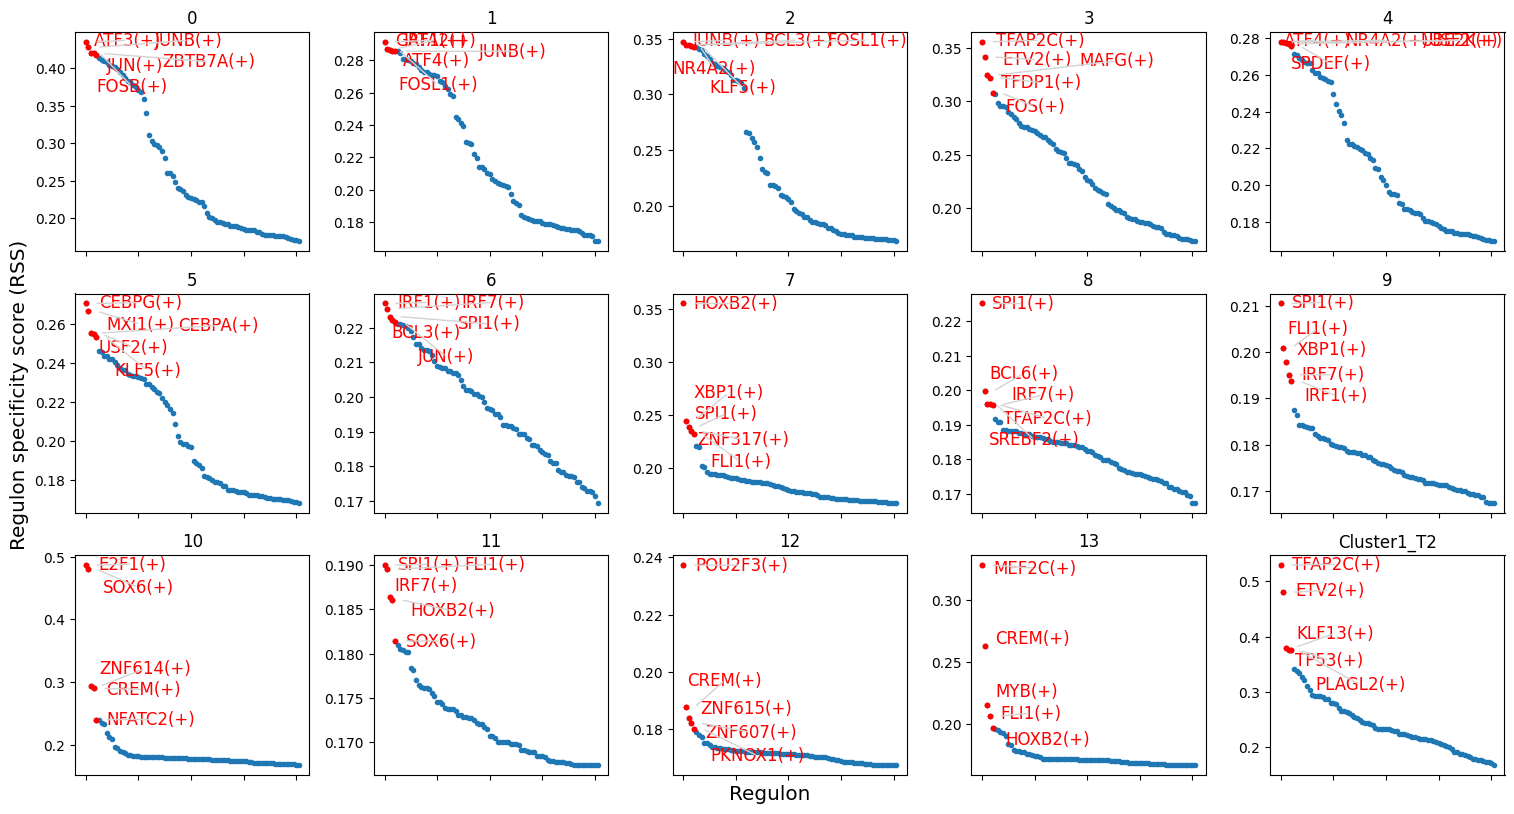

In [87]:
fig = plt.figure(figsize=(15, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(3,5,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })

In [88]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [89]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [90]:


colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in adata_non_immune_obs['leiden'] ]



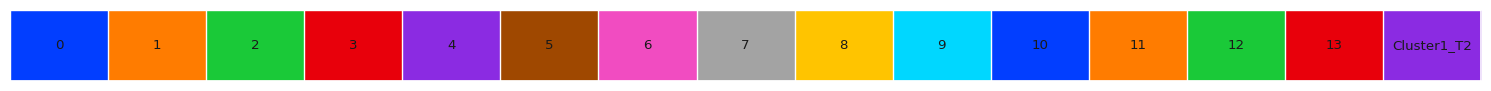

In [93]:
import matplotlib as mpl
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)

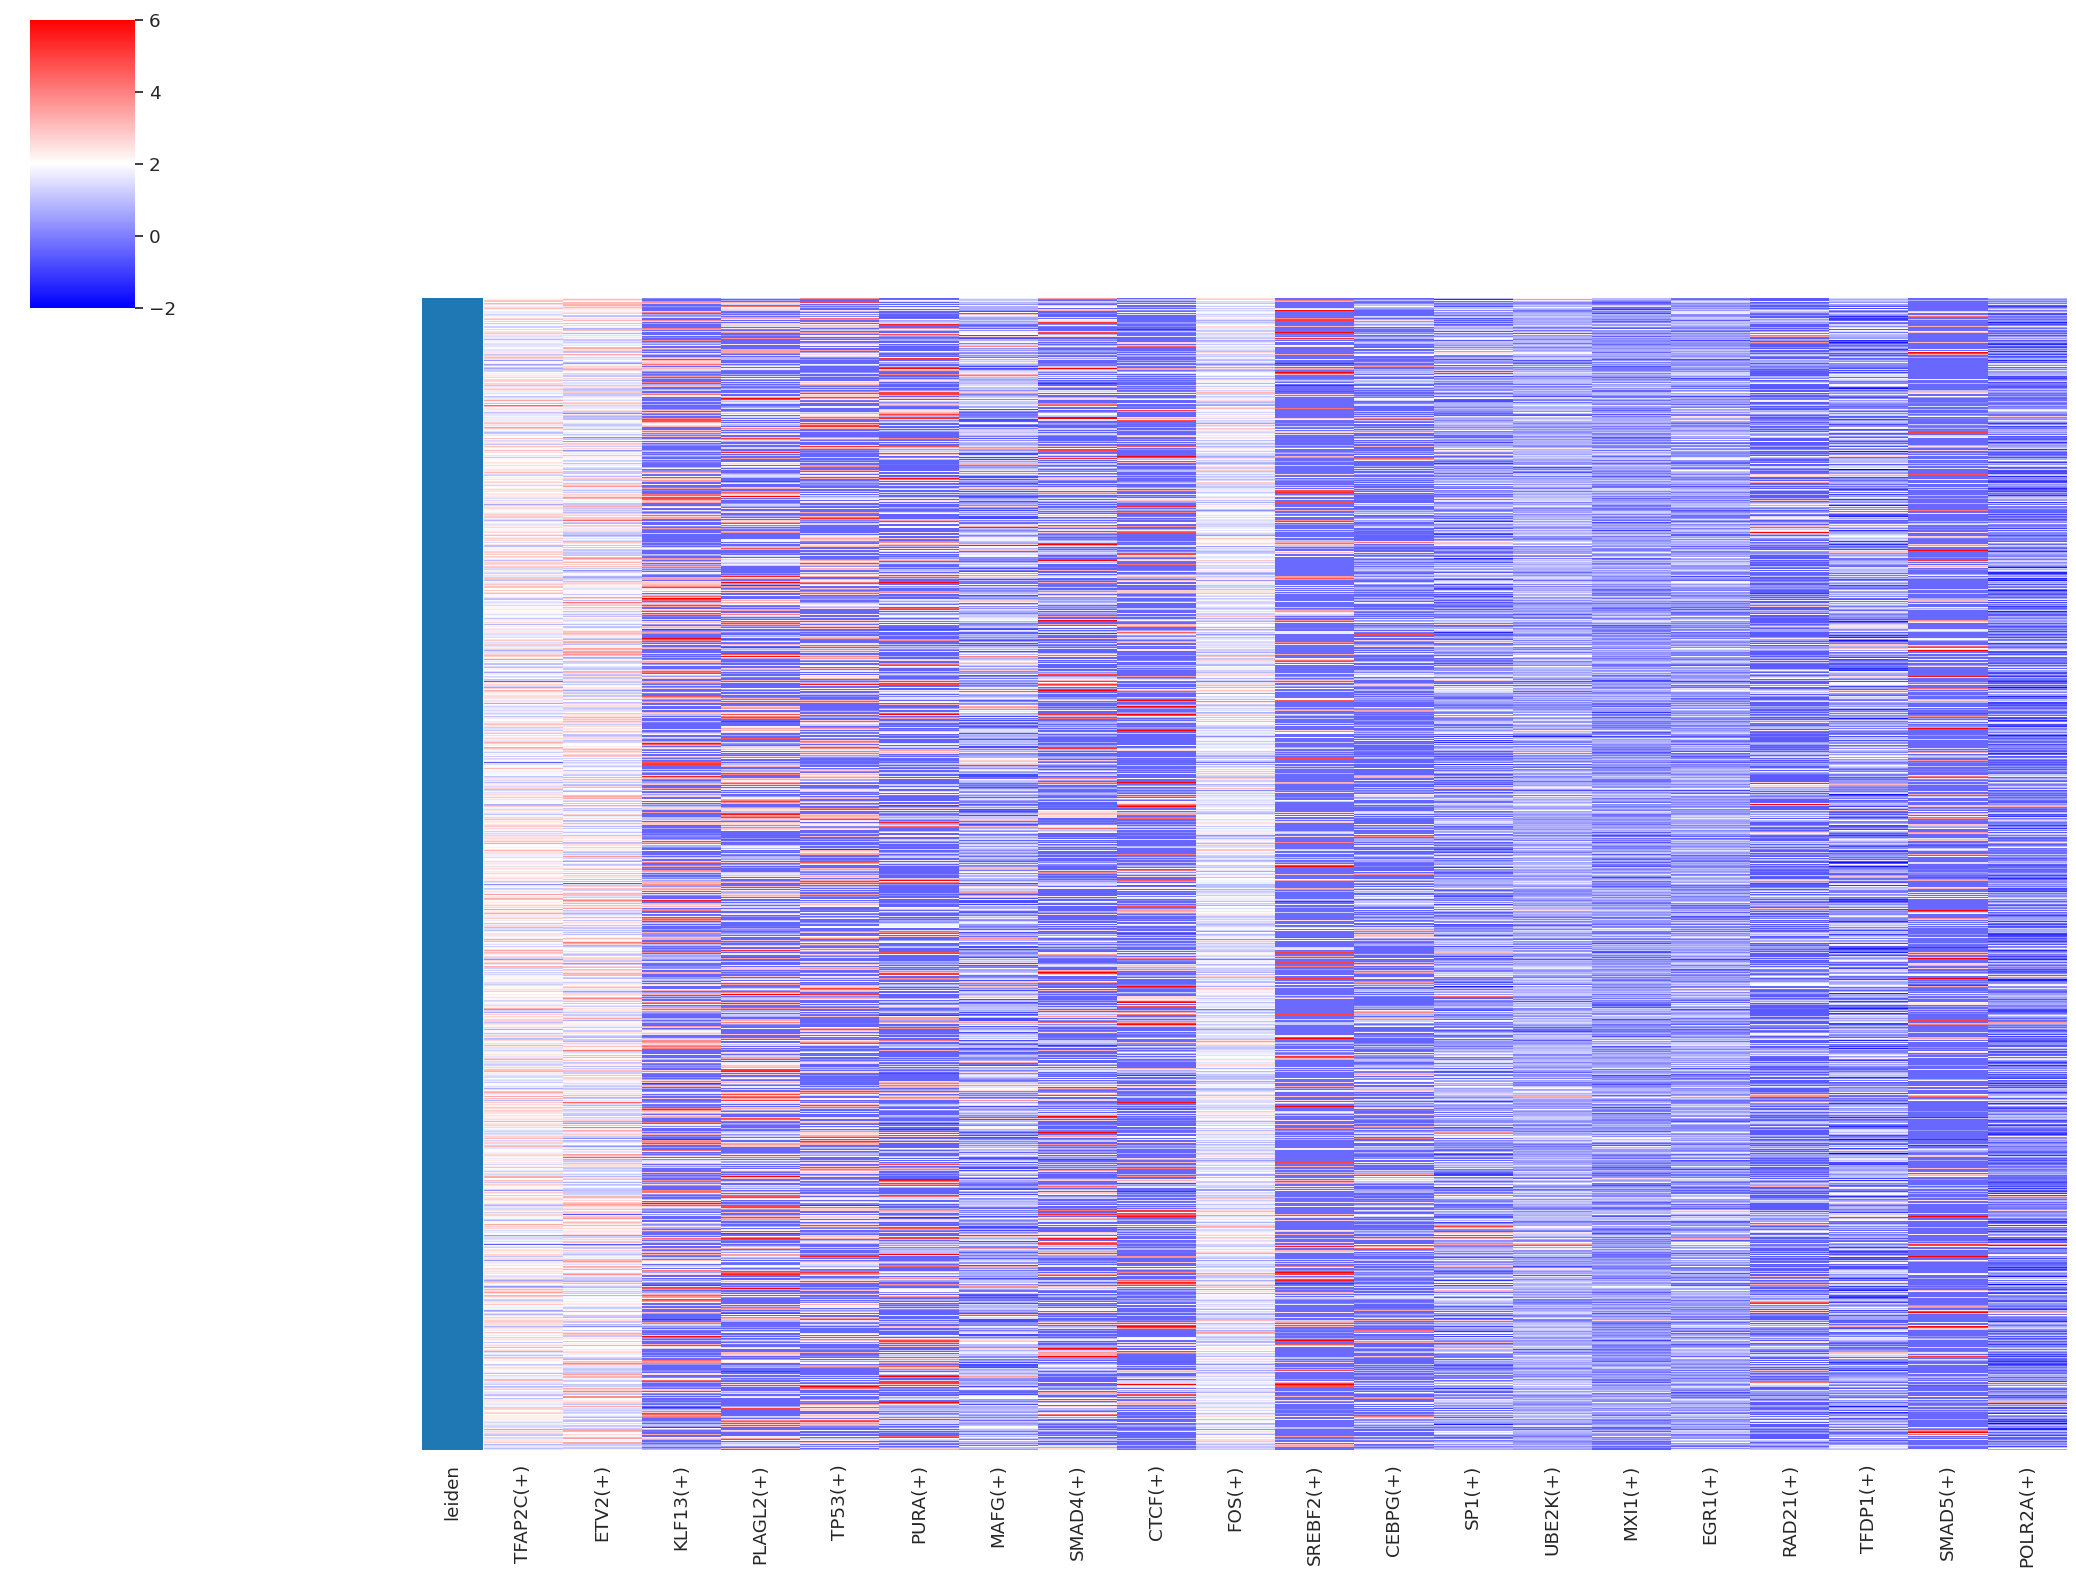

In [118]:
# Define clusters you want to include
clusters_to_plot = ['0', '1', 'Cluster1_T2']

# Filter clusters and AUC matrix accordingly
filtered_clusters = adata_non_immune_obs['leiden'].astype(str)
filtered_clusters = filtered_clusters[filtered_clusters.isin(list(set(adata_non_immune_obs['leiden'])))]
filtered_clusters.index = auc_mtx_Z.index.intersection(filtered_clusters.index)

# Filter and sort AUC matrix
sorted_index = filtered_clusters.sort_values().index
sorted_auc = auc_mtx_Z.loc[sorted_index, [
    'TFAP2C(+)', 'ETV2(+)', 'KLF13(+)', 'PLAGL2(+)', 'TP53(+)', 'PURA(+)',
    'MAFG(+)', 'SMAD4(+)', 'CTCF(+)', 'FOS(+)', 'SREBF2(+)', 'CEBPG(+)',
    'SP1(+)', 'UBE2K(+)', 'MXI1(+)', 'EGR1(+)', 'RAD21(+)', 'TFDP1(+)',
    'SMAD5(+)', 'POLR2A(+)'
]]

# Update cluster labels
sorted_cluster_labels = filtered_clusters.loc[sorted_index]

# Assign colors to Leiden clusters
import seaborn as sns
import matplotlib.pyplot as plt

unique_clusters = sorted_cluster_labels.unique()
palette = sns.color_palette("tab10", len(unique_clusters))
lut = dict(zip(unique_clusters, palette))
row_colors = sorted_cluster_labels.map(lut)

# Plot heatmap
g = sns.clustermap(
    sorted_auc,
    row_cluster=False,
    col_cluster=False,
    yticklabels=False,
    xticklabels=True,
    row_colors=row_colors,
    linecolor='gray',
    cmap="bwr",
    vmin=-2,
    vmax=6,
    figsize=(21, 16)
)
plt.show()


In [106]:
rss_cellType.T['Cluster1_T2'].sort_values(ascending=False)[:20].index

Index(['TFAP2C(+)', 'ETV2(+)', 'KLF13(+)', 'PLAGL2(+)', 'TP53(+)', 'PURA(+)',
       'MAFG(+)', 'SMAD4(+)', 'CTCF(+)', 'FOS(+)', 'SREBF2(+)', 'CEBPG(+)',
       'SP1(+)', 'UBE2K(+)', 'MXI1(+)', 'EGR1(+)', 'RAD21(+)', 'TFDP1(+)',
       'SMAD5(+)', 'POLR2A(+)'],
      dtype='object')

In [107]:
# Ensure 'leiden' is categorical and aligned with your index
clusters = adata_non_immune_obs['leiden'].astype(str)
clusters.index = auc_mtx_Z.index  # align index if needed

# Sort AUC matrix by Leiden clusters
sorted_index = clusters.sort_values().index
sorted_auc = auc_mtx_Z.loc[sorted_index, [['TFAP2C(+)', 'ETV2(+)', 'KLF13(+)', 'PLAGL2(+)', 'TP53(+)', 'PURA(+)',
       'MAFG(+)', 'SMAD4(+)', 'CTCF(+)', 'FOS(+)', 'SREBF2(+)', 'CEBPG(+)',
       'SP1(+)', 'UBE2K(+)', 'MXI1(+)', 'EGR1(+)', 'RAD21(+)', 'TFDP1(+)',
       'SMAD5(+)', 'POLR2A(+)']]]
sorted_cluster_labels = clusters.loc[sorted_index]

# Optional: Assign colors to Leiden clusters for row colors
import seaborn as sns
import matplotlib.pyplot as plt

unique_clusters = sorted_cluster_labels.unique()
palette = sns.color_palette("tab10", len(unique_clusters))
lut = dict(zip(unique_clusters, palette))
row_colors = sorted_cluster_labels.map(lut)

# Plot heatmap grouped by Leiden cluster (no clustering)
g = sns.clustermap(
    sorted_auc,
    row_cluster=False,
    col_cluster=False,
    yticklabels=False,
    xticklabels=True,
    row_colors=row_colors,
    linecolor='gray',
    cmap="YlGnBu",
    vmin=-2,
    vmax=6,
    figsize=(21, 16)
)
plt.show()


KeyError: "None of [Index([('TFAP2C(+)', 'ETV2(+)', 'KLF13(+)', 'PLAGL2(+)', 'TP53(+)', 'PURA(+)', 'MAFG(+)', 'SMAD4(+)', 'CTCF(+)', 'FOS(+)', 'SREBF2(+)', 'CEBPG(+)', 'SP1(+)', 'UBE2K(+)', 'MXI1(+)', 'EGR1(+)', 'RAD21(+)', 'TFDP1(+)', 'SMAD5(+)', 'POLR2A(+)')], dtype='object')] are in the [columns]"

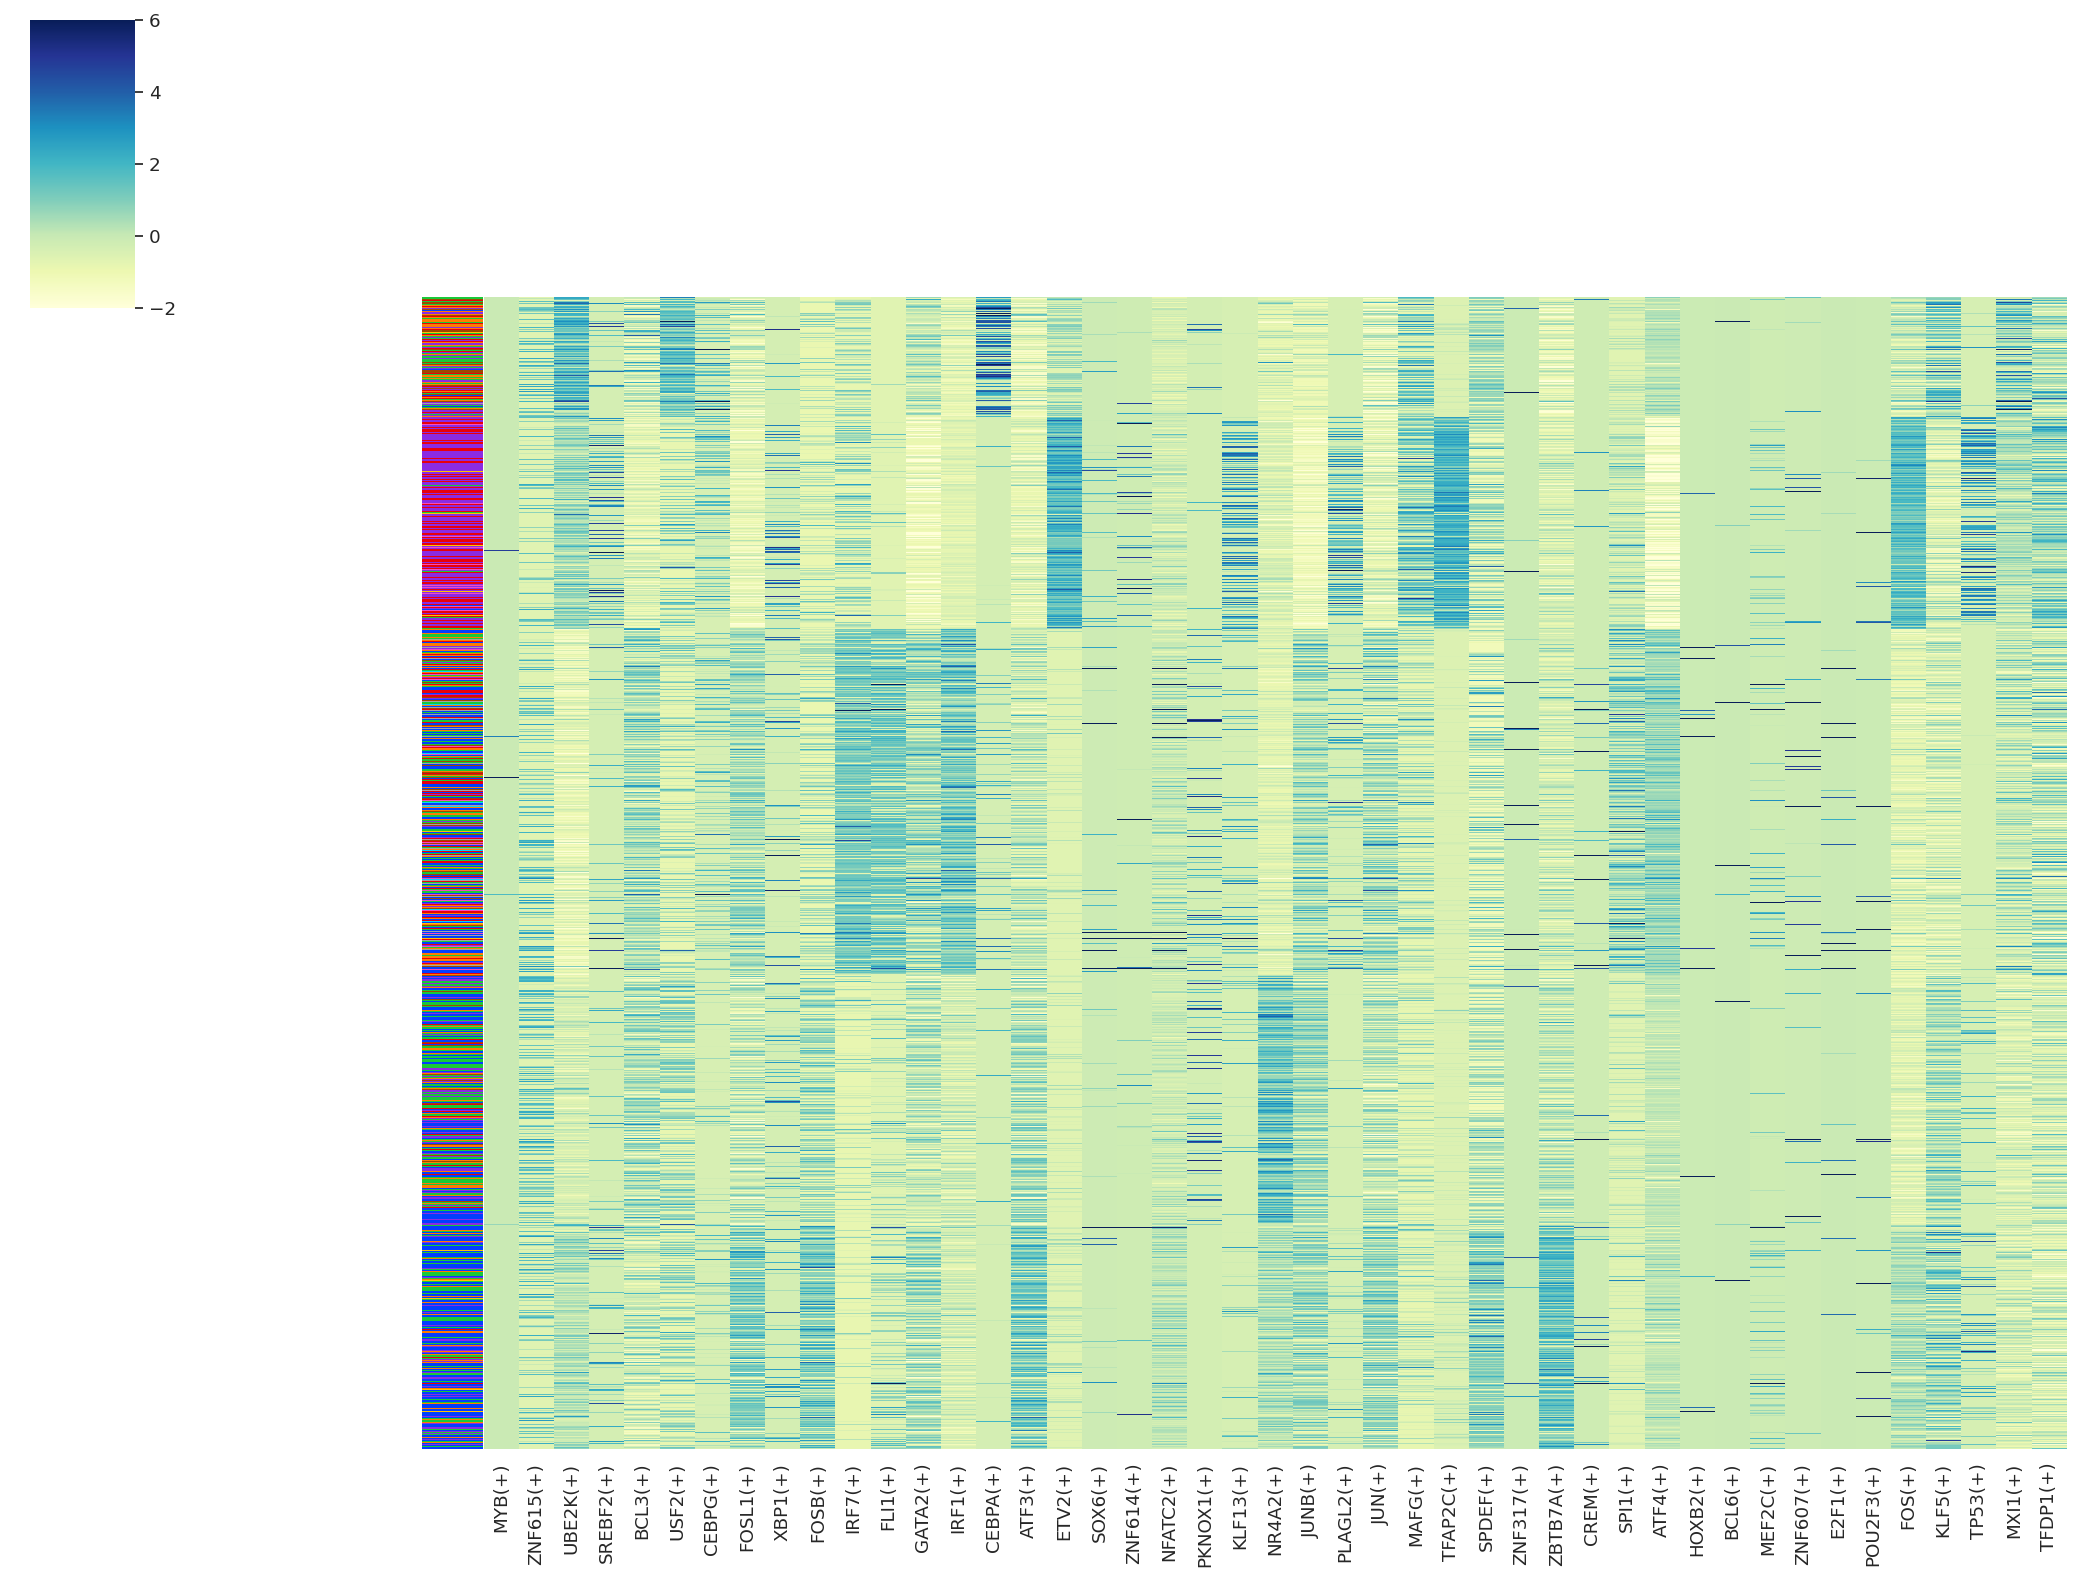

In [98]:
g = sns.clustermap(
    auc_mtx_Z[topreg],
    row_cluster=False,
    col_cluster=False,
    annot=False,
    yticklabels=False,
    xticklabels=True,
    linecolor='gray',
    row_colors=colormap,
    cmap="YlGnBu",
    vmin=-2,
    vmax=6,
    figsize=(21,16)
)


/home/jing/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jing/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, -70.08055555555582, '')

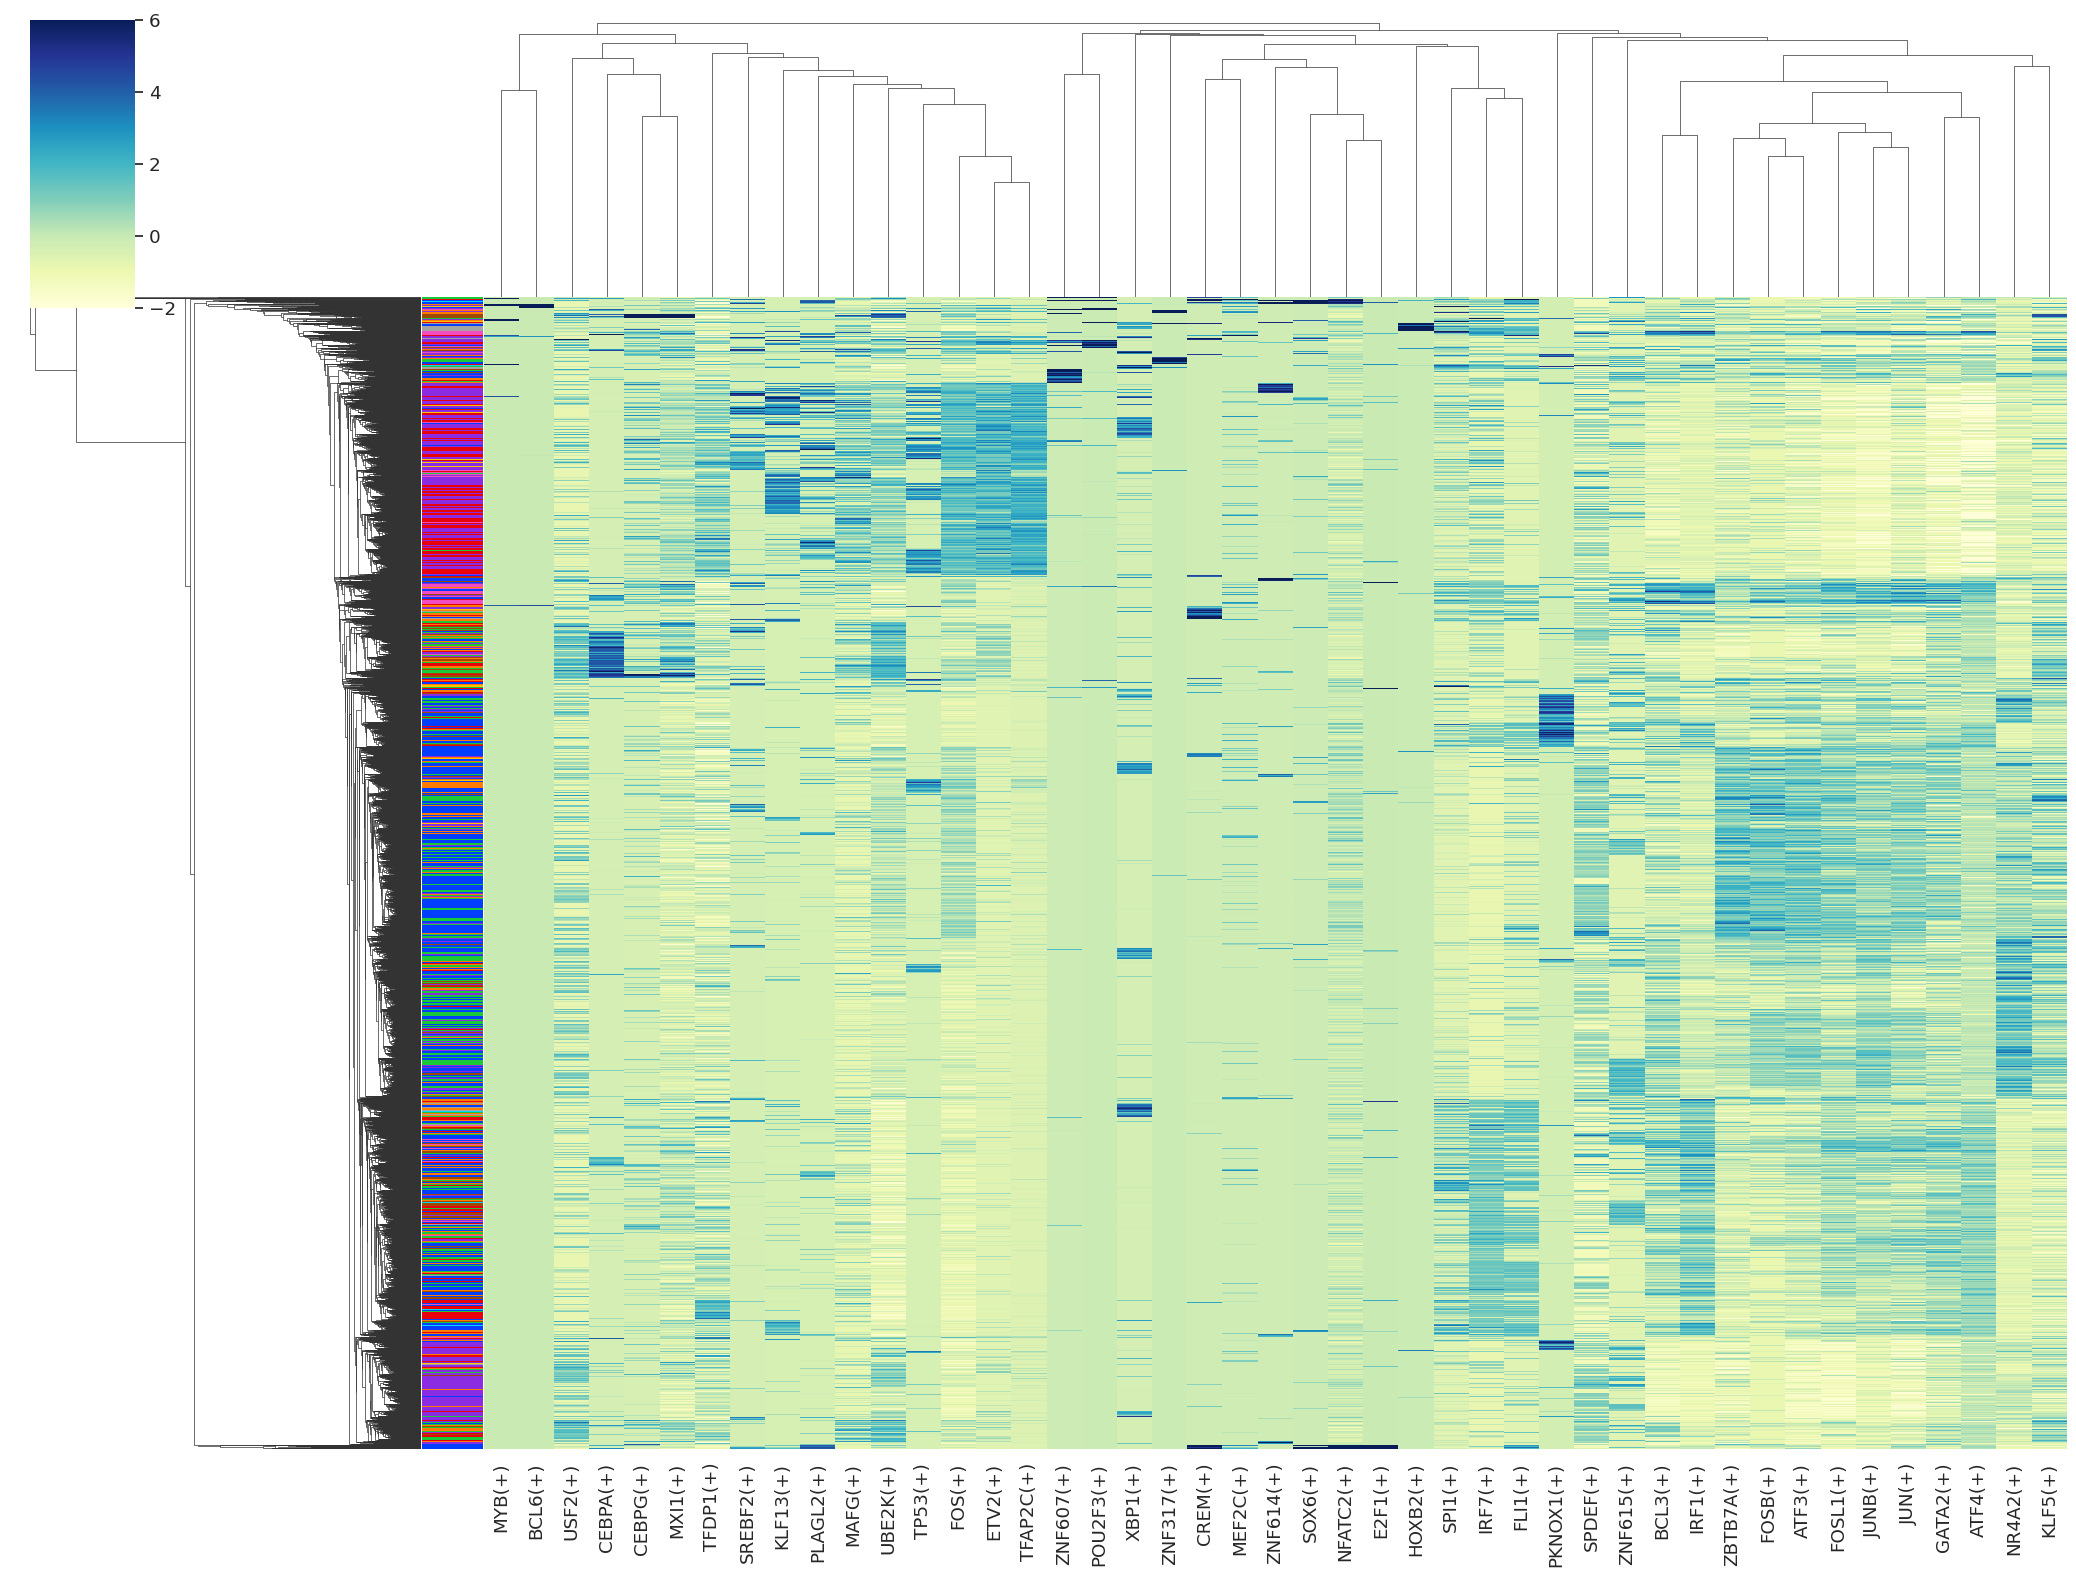

In [95]:


sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,row_linkage=None, col_linkage=None,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')

In [33]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)

/home/jing/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jing/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


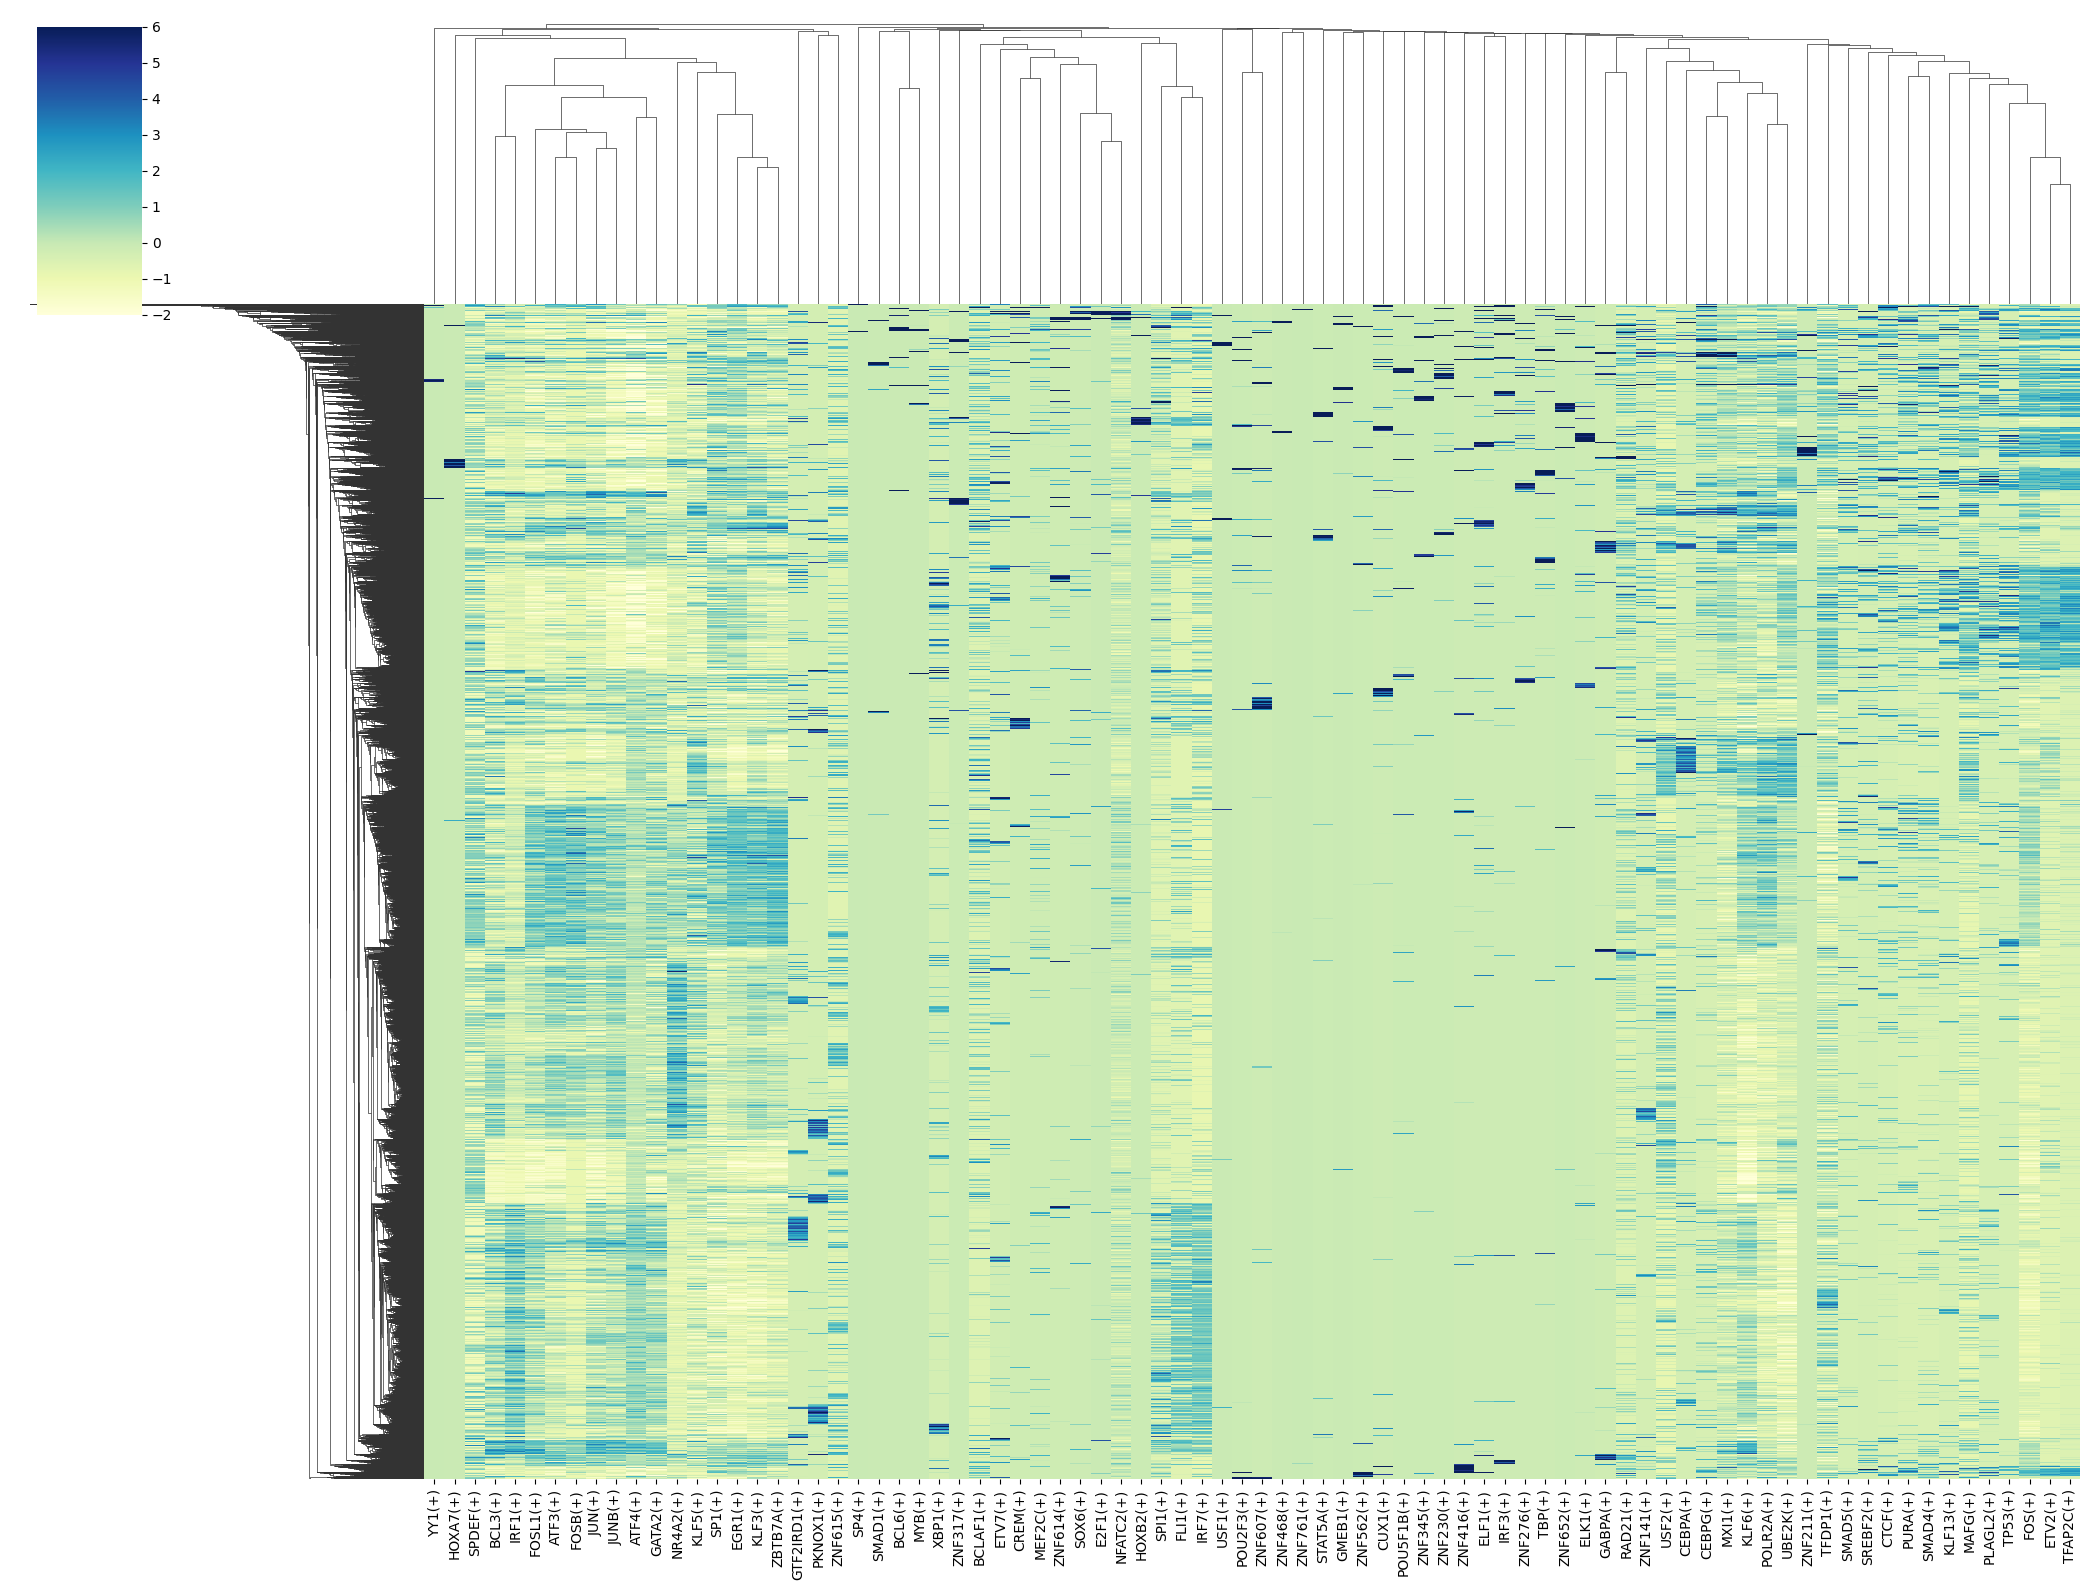

In [37]:
sns.clustermap(auc_mtx_Z, annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, 
    cmap="YlGnBu", figsize=(21,16) )